In [1]:
from keras.datasets.mnist import load_data
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# 홀수여부(홀수:1, 짝수:0)
y_train_odd = []
for y in y_train:
  if y % 2 ==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [4]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [5]:
y_test_odd = []
for y in y_test:
  if y % 2 ==0:
    y_test_odd.append(0)
  else:
    y_test_odd.append(1)

y_test_odd = np.array(y_test_odd)
y_test_odd.shape

(10000,)

In [6]:
x_train.min(),x_train.max()

(0, 255)

In [7]:
x_train = x_train/255.
x_test = x_test/255.

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# 채널이 없음. ->모양이 맞지 않아 차원 추가

In [10]:
x_train_in = np.expand_dims(x_train, -1)

x_test_in = np.expand_dims(x_test, -1)

x_train_in.shape , x_test_in.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
# 평션얼 api로  모델를 만들적에는
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Concatenate
# 분리 되었다가 다시 합쳐지기 위한

In [12]:
inputs = Input(shape = ( 28, 28, 1))
# 들어오는 데이터에 대한 형식, 차원, 구조를 넣어준다.
# input 객체?

conv = Conv2D(32, (3,3), activation='relu')(inputs)
# 필터 수 32
# 커널 사이즈 (3,3)
# 들어오는 데이터 설정한 객체를 넣어준다.

pool = MaxPool2D((2,2))(conv)
# pool size
# conv를 받아 처리한다다

flat = Flatten()(pool)

flat_inputs = Flatten()(inputs)
# inputs 이 conv 에도 한번, flat_inputs 에도 한번 들어갔다.
# 나뉘어졌다.

concat = Concatenate()([flat, flat_inputs ])

outputs = Dense(10, activation = 'softmax')(concat)


model = Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

In [13]:
from keras.utils import plot_model

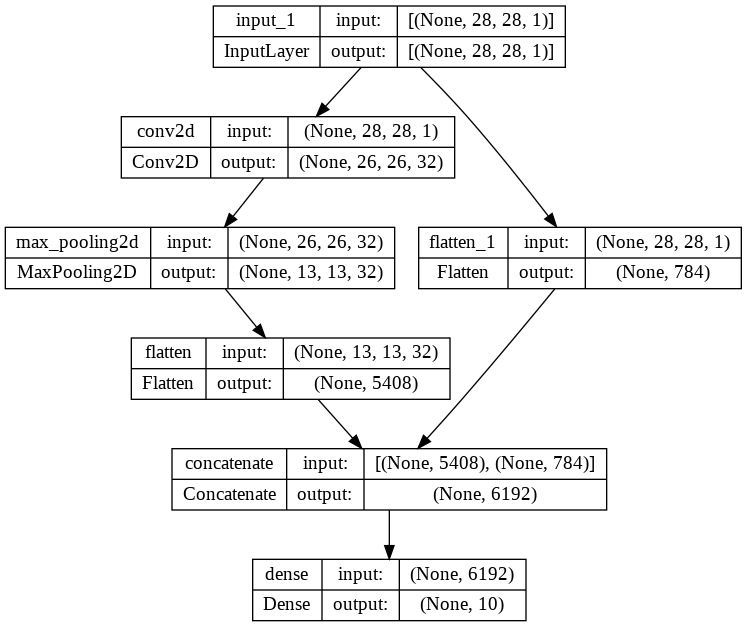

In [14]:
plot_model(model, show_shapes = True, show_layer_names = True)

In [15]:
# 순차적으로 쌓아주는 시퀀셜
# 평션 api를 이용한 구조
# 클래스 사용

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])# 'acc'라고 적어도 된다.
# 모델 옵티마이져, loss, 메트릭스 설정.

history = model.fit(x_train_in, y_train, validation_data=(x_test_in, y_test), epochs = 10)
# x_train_in 모양 맞춰놓은 데이터

model.evaluate(x_test_in, y_test)



Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.2058 - accuracy: 0.9418 - val_loss: 0.0845 - val_accuracy: 0.9744
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0795 - accuracy: 0.9773 - val_loss: 0.0657 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0608 - accuracy: 0.9814 - val_loss: 0.0617 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0537 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0575 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0620 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0665 - val_accuracy

[0.06566094607114792, 0.982200026512146]

In [17]:
#loss, acc [0.059482917189598083, 0.9830999970436096] 

# 손 글씨 해보세요요

In [18]:
inputs = Input(shape = ( 28, 28, 1), name = 'inputs')
# name 추가 (임의로 지어진 이름 대신 이름 부여)


conv = Conv2D(32, (3,3), activation='relu', name = 'conv2d')(inputs)

pool = MaxPool2D((2,2), name = 'maxpool')(conv)


flat = Flatten(name = 'flatten')(pool)

flat_inputs = Flatten()(inputs)

concat = Concatenate()([flat, flat_inputs ])

# 입력하나에 출력 두개.
digit_outputs = Dense(10, activation = 'softmax', name ='digit_output' )(concat)
odd_outputs = Dense(1,activation = 'sigmoid', name = 'odd_output')(flat_inputs)

model = Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool (MaxPooling2D)         (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['maxpool[0][0]']                
                                                                                            

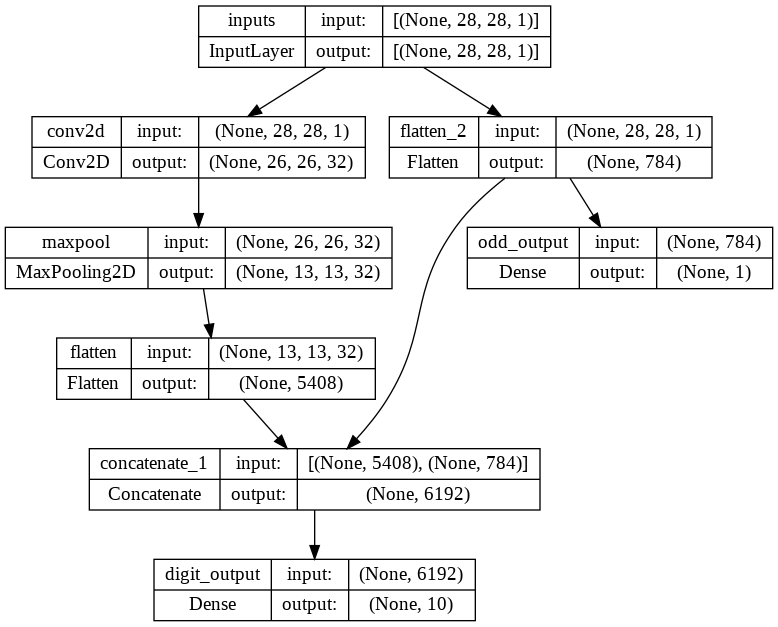

In [19]:
plot_model(model, show_shapes = True, show_layer_names = True)

In [20]:
# conv2d, maxpool 의 경우 원본이 지나치게 변경, 왜곡, 손상 될 수 있다.
# 따라서 원본 데이터를 바로 하는 것도 만들어 볼 수 ㅇㅆ다

In [21]:
print(model.input)
# 정의된 input 확인

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")


In [22]:
print(model.output)

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_output')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_output')>]


In [23]:
model.compile(optimizer = 'adam',
              loss ={'digit_output':'sparse_categorical_crossentropy',
                     'odd_output' : 'binary_crossentropy'},
              loss_weights = {'digit_output' : 1 , 'odd_output' : 0.5 },
              # 결과가 두가지 이므로, 각 결과가 얼마나 영향을 줄지 비율을 설정한다.   ?
              metrics = ['accuracy'])
# 어떤 부분에서 어떤 것을 써야하는지,

history = model.fit({'inputs' : x_train_in},
                    [y_train,y_train_odd],

                    # y 01234 와 01 로 이루어진 두가지.
                    validation_data=({'inputs' :x_test_in},{'digit_output' : y_test,
                     'odd_output': y_test_odd}),
                    epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3588 - digit_output_loss: 0.1969 - odd_output_loss: 0.3239 - digit_output_accuracy: 0.9442 - odd_output_accuracy: 0.8651 - val_loss: 0.2258 - val_digit_output_loss: 0.0877 - val_odd_output_loss: 0.2763 - val_digit_output_accuracy: 0.9720 - val_odd_output_accuracy: 0.8897
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2135 - digit_output_loss: 0.0777 - odd_output_loss: 0.2717 - digit_output_accuracy: 0.9776 - odd_output_accuracy: 0.8916 - val_loss: 0.1987 - val_digit_output_loss: 0.0667 - val_odd_output_loss: 0.2640 - val_digit_output_accuracy: 0.9788 - val_odd_output_accuracy: 0.8958
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1905 - digit_output_loss: 0.0592 - odd_output_loss: 0.2627 - digit_output_accuracy: 0.9827 - odd_output_accuracy: 0.8959 - val_loss: 0.1868 - val_digit_output_loss: 0.0568 - val_odd_output_loss: 0.2599 - val_digit_output_a

In [24]:
# 평션 api의 경우 차곡차곡 쌓는 형식이 아닌 원하는 형태로 나뉘었다가 합칠 수 있다.

In [25]:
model.evaluate({'inputs':x_test_in}, {'digit_output':y_test,'odd_output':y_test_odd})

313/313 [==============================] - 1s 3ms/step - loss: 0.1843 - digit_output_loss: 0.0566 - odd_output_loss: 0.2555 - digit_output_accuracy: 0.9841 - odd_output_accuracy: 0.9006


[0.18429140746593475,
 0.056564293801784515,
 0.25545448064804077,
 0.9840999841690063,
 0.900600016117096]

In [26]:
digit, odd = model.predict(x_test_in)

313/313 [==============================] - 1s 2ms/step


In [27]:
np.argmax(np.round(digit[0],2))

7

In [28]:
odd[0]

array([0.9995615], dtype=float32)

In [29]:
(odd[0]>0.5).astype(int)

array([1])

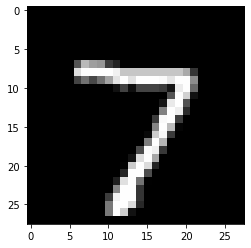

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0],cmap = 'gray')

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool (MaxPooling2D)         (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['maxpool[0][0]']                
                                                                                            

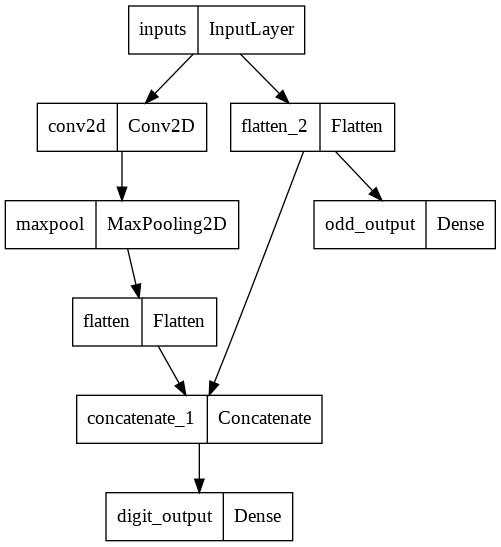

In [32]:
plot_model(model)

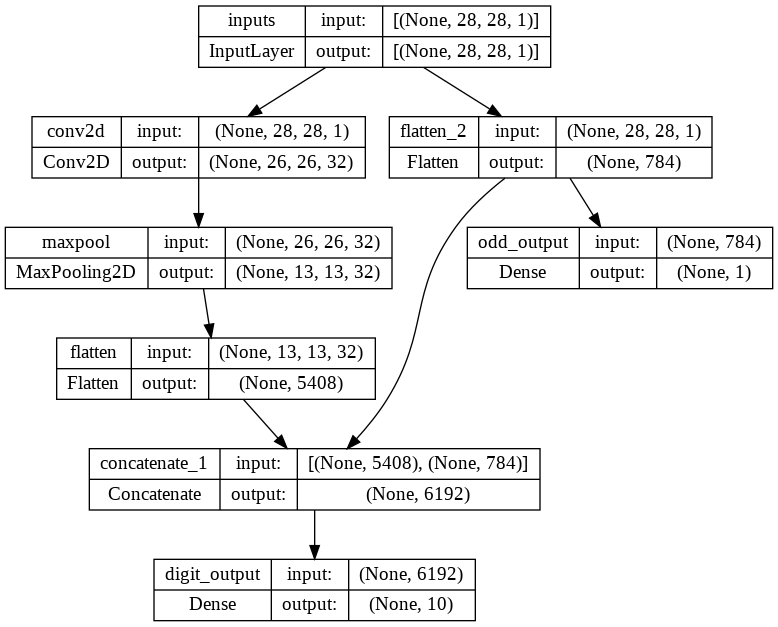

In [33]:
plot_model(model, show_shapes = True , show_layer_names = True)

In [34]:
# Flatten 에서의 데이터를 추출.

base_model_output = model.get_layer('flatten').output

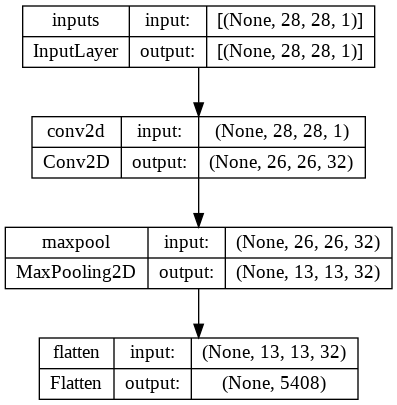

In [35]:
# 먼저, 전체 모델에서, 중간 단계 모델을 추출.
base_model = Model(inputs = model.input , outputs = base_model_output, name = 'base' )

# base_model_output = model.get_layer('flatten').output

plot_model(base_model, show_shapes = True , show_layer_names = True)


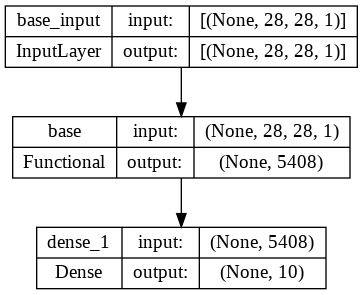

In [36]:
from keras import Sequential
digit_model = Sequential([
    base_model,
    Dense(10,activation = 'softmax')
    ])

# 위에서 추출한 베이스 모델 위에 쌓아주었다.
# base_model


plot_model(digit_model, show_shapes = True , show_layer_names = True)

In [37]:
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [38]:
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 maxpool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool (MaxPooling2D)         (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['maxpool[0][0]']                
                                                                                            

In [40]:
digit_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'] )

history = digit_model.fit(x_train_in,
                          y_train,
                          validation_data = (x_test_in, y_test),
                          epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1310 - acc: 0.9629 - val_loss: 0.0679 - val_acc: 0.9784
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - acc: 0.9823 - val_loss: 0.0586 - val_acc: 0.9808
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426 - acc: 0.9873 - val_loss: 0.0617 - val_acc: 0.9796
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - acc: 0.9894 - val_loss: 0.0497 - val_acc: 0.9834
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.0531 - val_acc: 0.9831


In [41]:
# 이미 학습된 데이터가 있는 모델이기 처음부터 확률이 조금 높게 나온다

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 maxpool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


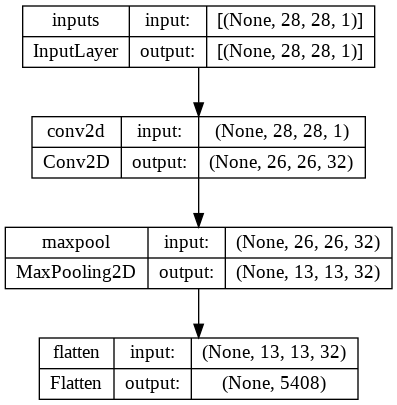

In [42]:
base_model_frozen =  Model(inputs=model.input,outputs=base_model_output,name='base_frozen')


base_model_frozen.summary()

# 함수 api 방식으로 봐야지만, 내부 구조를 볼 수 있다.
# 시퀸셜에서는 그냥 한칸으로 나왔던 것을 기억한다.

plot_model(base_model_frozen,show_shapes=True,show_layer_names=True)

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 maxpool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


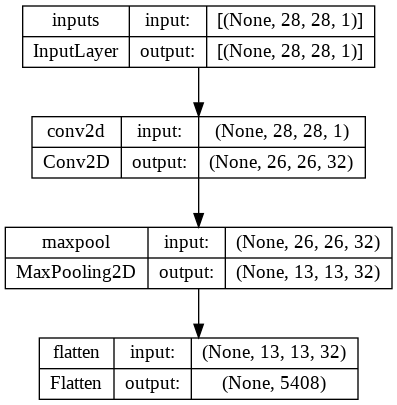

In [43]:
base_model_frozen =  Model(inputs=model.input,outputs=base_model_output,name='base_frozen')
base_model_frozen.trainable = False
# 모델의 모든 구조를 동결
# 학습을 해도 변하지 않는다.


base_model_frozen.summary()

# 함수 api 방식으로 봐야지만, 내부 구조를 볼 수 있다.
# 시퀸셜에서는 그냥 한칸으로 나왔던 것을 기억한다.

plot_model(base_model_frozen,show_shapes=True,show_layer_names=True)

In [44]:
# 이후 예측하거나 부분적으로 동결을 해제해 학습이 가능하다.

In [45]:
# 분류기 추가해본다.

dense_output = Dense(10, activation = 'softmax')(base_model_frozen.output)
# 함수 api 방식으로 뭘 받을지 정해야 한다.
# 베이스 모델의 아웃풋에 연결을 해라

digit_model_frozen = Model(inputs = base_model_frozen.input , outputs = dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 maxpool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_________________________________________________________________


In [46]:
digit_model_frozen.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'] )

history = digit_model_frozen.fit(x_train_in,
                          y_train,
                          validation_data = (x_test_in, y_test),
                          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1163 - acc: 0.9679 - val_loss: 0.0578 - val_acc: 0.9817
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0493 - acc: 0.9856 - val_loss: 0.0567 - val_acc: 0.9818
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - acc: 0.9886 - val_loss: 0.0489 - val_acc: 0.9841
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0282 - acc: 0.9918 - val_loss: 0.0512 - val_acc: 0.9831
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234 - acc: 0.9927 - val_loss: 0.0555 - val_acc: 0.9831
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - acc: 0.9946 - val_loss: 0.0508 - val_acc: 0.9846
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0156 - acc: 0.9953 - val_loss: 0.0589 - val_acc: 0.9830
Epoch 8/10
1875/1875 [==============================] - 5s 2ms

In [47]:
digit_model_frozen.get_layer('conv2d').trainable
# conv2d의 동결 여부 확인
# 전부 모델 중 특정 layer만 동결 해제하여 학습을 할 수도 있다.

False

In [48]:
# 이건 비교적 얇은 모델이기 때문에 동결된 파람이 320개로 비교적 작지만, 깊이가 깊어지면, 더 많아질 것이다.
# 

In [49]:
base_model_frozen =  Model(inputs=model.input,outputs=base_model_output,name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()
# plot_model(base_model_frozen,show_shapes=True,show_layer_names=True)

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 maxpool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [50]:
dense_output = Dense(10,activation='softmax')(base_model_frozen.output)
digit_model_frozen = Model(inputs=base_model_frozen.input,outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 maxpool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_________________________________________________________________


In [51]:
digit_model_frozen.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history = digit_model_frozen.fit(x_train_in,y_train,
                          validation_data=(x_test_in,y_test),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1171 - acc: 0.9688 - val_loss: 0.0550 - val_acc: 0.9831
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0493 - acc: 0.9852 - val_loss: 0.0519 - val_acc: 0.9828
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0364 - acc: 0.9890 - val_loss: 0.0621 - val_acc: 0.9784
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0292 - acc: 0.9912 - val_loss: 0.0486 - val_acc: 0.9845
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0226 - acc: 0.9931 - val_loss: 0.0492 - val_acc: 0.9840
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0193 - acc: 0.9940 - val_loss: 0.0588 - val_acc: 0.9812
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0152 - acc: 0.9955 - val_loss: 0.0557 - val_acc: 0.9831
Epoch 8/10
1875/1875 [==============================] - 5s 2ms

In [52]:
digit_model_frozen.get_layer('conv2d').trainable = True

In [53]:
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 maxpool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
